# Lecutre 02: Basic Statistics 
### Topics: Random numbers; expected value, variance, histogram of Bernoulli, Poisson and Normal Distribution

In [1]:
## Packages used in this session
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## 1. Random Number Generator

### Generate Number from Normal Distribution

In [45]:
msize=3
M = np.random.randn(msize,)
print(M)

[[-0.65076339  1.54329061  0.89902248]
 [-0.05550805  1.07398626 -1.72706687]
 [-1.9666488  -0.15989579  1.27453299]]


### Generate Number from Uniform Distribution

In [46]:
M = np.random.rand(msize,msize)
print(M)

[[0.50808195 0.39873594 0.5606066 ]
 [0.29693761 0.61638924 0.11528536]
 [0.95224953 0.89996643 0.68546591]]


## 2. Expected Value of the Rows

### Calculate with Numpy Function

In [47]:
np.mean(M[0])

0.48914149773480337

In [48]:
np.mean(M, 1) # Calculate Mean by Row

array([0.4891415 , 0.34287074, 0.84589396])

In [49]:
np.mean(M, 0) # Calculate Mean by Column

array([0.58575637, 0.63836387, 0.45378596])

### Calculate Mean by Column with Loop

In [50]:
import time
t0=time.time()
for i in range(M.shape[0]):
    print (np.mean(M[i]))
print ("time:", time.time()-t0)

0.48914149773480337
0.342870738709908
0.8458939606178487
time: 0.0007481575012207031


### Calculate Using Matrix (Vectorize)

In [56]:
t0=time.time()
expM=np.matmul(M, np.ones(msize))/msize
print ("mean:", expM)
print ("time:", time.time()-t0)

mean: [0.4891415  0.34287074 0.84589396]
time: 0.0006687641143798828


## 3. Variance, Standard Deviation

### Calculate with Numpy Function

In [59]:
print (np.var(M[0]))
print (np.sqrt(np.var(M[0])))
print (np.std(M[0]))

0.0045463892115051715
0.06742691755897767
0.06742691755897767


In [55]:
np.dot((M[0]-np.mean(M[0])), (M[0]-np.mean(M[0])))/msize

0.0045463892115051715

In [74]:
np.matmul(M-np.mean(M,1).reshape(3,1), (M-np.mean(M,1).reshape(3,1)).T)/msize

array([[ 0.00454639, -0.013954  , -0.00477968],
       [-0.013954  ,  0.04290577,  0.01547188],
       [-0.00477968,  0.01547188,  0.01332417]])

In [69]:
M-np.mean(M,1).reshape(3,1)

array([[ 0.01894046, -0.09040556,  0.0714651 ],
       [-0.04593313,  0.2735185 , -0.22758537],
       [ 0.10635557,  0.05407247, -0.16042805]])

## 4. Common Random Distribution: Bernoulli, Poisson, Normal
### Bernoulli Distribution/Binomial Distribution
\begin{equation}
P(k)=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation}

It becomes binomial distribution 
When $n=1$

\begin{equation}
P(k)=p^k(1-p)^{1-k}, k=0 \text{ or } 1
\end{equation}

In [76]:
bernoulitrial=np.random.binomial(1, 0.3, 5000) #n=1; p=0.3

In [77]:
bernoulitrial

array([1, 0, 1, ..., 1, 0, 1])

In [85]:
unique_elements, counts_elements=np.unique(bernoulitrial, return_counts=True)

In [84]:
print ('unique elements: ', unique_elements, '; counts: ', counts_elements)

unique elements:  [0 1] ; counts:  [3471 1529]


### Mean and Variance of Bernoulli Distribution
Expected Value: $E(X)=p$

Variance: $Var(X)=p(1-p)$

In [87]:
print('mean: ', np.mean(bernoulitrial))
print('variance: ',np.var(bernoulitrial))

mean:  0.3058
variance:  0.21228635999999998


### Histogram

In [91]:
binblock=np.arange(-.5, 2, 1)
print(binblock)

[-0.5  0.5  1.5]


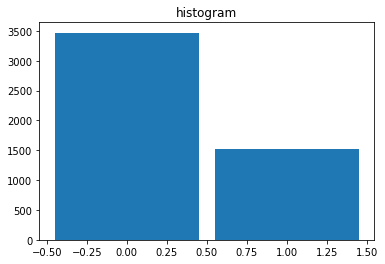

In [92]:
plt.hist(bernoulitrial, bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

### Create Binomial Distribution from Bernouli Distributioni

$X=X_1+X_2+...X_n$ is a binomial distribution with parameter $n$ and $p$, if $X_i$ are random variables of Bernoulli distribution of parameter $p$

In [102]:
BernoulliNP = np.empty((5000,3))
for i in range(3):
    BernoulliNP[:,i]=np.random.binomial(1, 0.5, 5000)

In [103]:
BernoulliNP.shape

(5000, 3)

In [104]:
BernoulliNP

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [105]:
BinomialNP=np.sum(BernoulliNP, axis=1) #sum by row

In [107]:
BinomialNP.shape ## BinomialNP follows binomial distribution with n=3 and p=0.5

(5000,)

In [108]:
unique_elements, counts_elements = np.unique(BinomialNP, return_counts=True)

In [113]:
print('values: ', unique_elements, 'counts: ', counts_elements)

values:  [0. 1. 2. 3.] counts:  [ 652 1844 1860  644]


[-0.5  0.5  1.5  2.5  3.5]


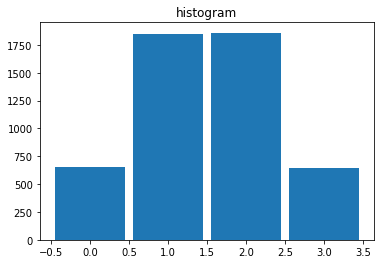

In [118]:
binblock=np.arange(-.5, 4, 1)
print(binblock)
plt.hist(BinomialNP, bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

### The probability for each value can be calculated using p=0.5
\begin{equation*}
X=
\begin{cases}
x=0, p^3=0.125\\
x=1, 3p(1-p)^2=0.375\\
x=2, 3p^2(1-p) = 0.375\\
x=3, (1-p)^3=0.125\\
\end{cases}
\end{equation*}


In [119]:
counts_elements/len(BinomialNP)

array([0.1304, 0.3688, 0.372 , 0.1288])

### Poisson Distribution

#### Distribution function $P(k)=\frac{\lambda^k}{k!}e^{-\lambda}$, $k=0, 1, 2, ...$

#### Expected Value $E(X)=\lambda$

#### Variance $Var(X)=\lambda$

In [128]:
poisson_trial=np.random.poisson(10, 5000) #lambda=10

In [129]:
poisson_trial

array([17, 14, 10, ..., 12,  7, 13])

In [130]:
print(np.mean(poisson_trial))
print(np.var(poisson_trial))

10.041
9.888919


#### Histogram 

In [124]:
unique_elements, counts_elements = np.unique(poisson_trial, return_counts=True)

In [132]:
unique_elements

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [133]:
counts_elements

array([  3,   7,  36, 105, 194, 326, 462, 586, 636, 606, 596, 436, 372,
       243, 154,  97,  71,  36,  13,  12,   8,   1])

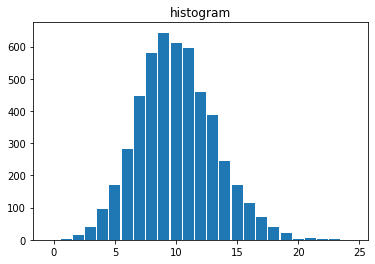

In [134]:
# histogram of np uniform distribution
binblock=np.arange(-0.5, 25.5, 1)
plt.hist(poisson_trial, bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

### Dice-Rolling

In [ ]:
dice_trial=np.random.randint(1, 7, (5000, 1))

In [ ]:
np.unique(dice_trial)

In [ ]:
binblock=np.arange(-0.5, 7, 1)
plt.hist(dice_trial, bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

In [ ]:
uniformtrial=np.random.rand(5000, 1)
binblock=np.arange(-0.1, 1.1, 0.1 )
plt.hist(uniformtrial, bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

### Normal Distribution
$$f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$
$$E(X)=\int\limits_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}}xe^{-\frac{x^2}{2}}dx=0$$
$$Var(X)=\int\limits_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}}x^2e^{-\frac{x^2}{2}}dx=1$$

In [136]:
# histgram of np normal random distribution
normaltrial=np.random.randn(5000, 1)
print (normaltrial)

[[ 1.42874442]
 [-2.18170562]
 [-0.13066136]
 ...
 [ 1.46575141]
 [-1.60170887]
 [-2.0744864 ]]


In [46]:
np.mean(normaltrial)

0.004135332082641173

In [47]:
np.var(normaltrial)

1.005739694092676

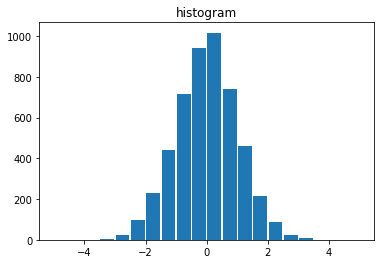

In [50]:
binblock=np.arange(-5, 5.5, 0.5)
plt.hist(normaltrial, bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

#### Normal Distribution of any mean $\mu$ and variance $\sigma$ can be generated by using the following formula

$N(\mu, \sigma)=\mu+\sigma N(0,1)$

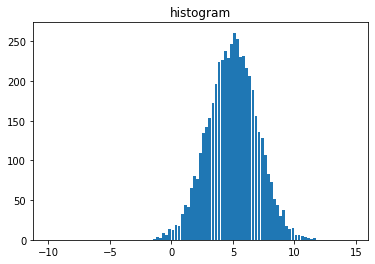

In [139]:
# histgram of np normal random distribution
normaltrial=2*np.random.randn(5000, 1)+5

binblock=np.arange(-10, 15, 0.25)
plt.hist(normaltrial, bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

In [140]:
np.var(normaltrial)

3.907193020860893

In [141]:
np.mean(normaltrial)

4.980029659427174